In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
#app_train.columns.values

In [5]:
app_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
app_train.shape

(307511, 122)

In [21]:
data = app_train['AMT_INCOME_TOTAL']
print("平均數 =", data.mean())
print("標準差 =", data.std())
print("最大 =", data.max())
print("最小 =", data.min())

平均數 = 168797.9192969845
標準差 = 237123.14627883647
最大 = 117000000.0
最小 = 25650.0


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


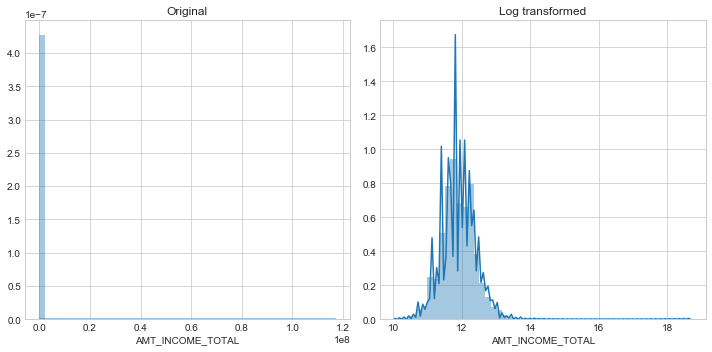

In [22]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(data)
plt.title('Original')

plt.subplot(1,2,2)
sns.distplot(np.log1p(data))
plt.title('Log transformed')

plt.tight_layout()

In [24]:
mylist = app_train['CNT_FAM_MEMBERS']
mylist = mylist.dropna()
mylist.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [25]:
fam_count = []
for item in range(int(mylist.min()), int(mylist.max())+1):
    count = len(mylist[mylist==item])
    fam_count.append(count)
    print(item, count)

1 67847
2 158357
3 52601
4 24697
5 3478
6 408
7 81
8 20
9 6
10 3
11 1
12 2
13 1
14 2
15 1
16 2
17 0
18 0
19 0
20 2


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


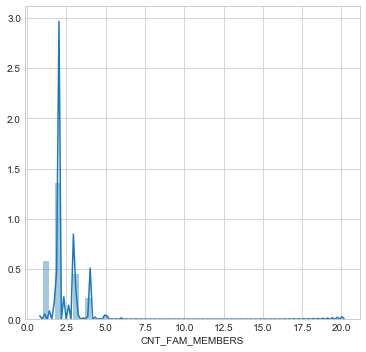

In [28]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(mylist)
plt.tight_layout()

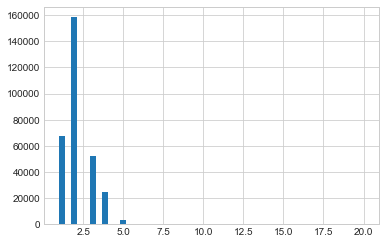

In [32]:
#plt.hist(mylist)
mylist.hist(bins=50)

In [12]:
#myset = set(mylist) #myset是另外一个列表，里面的内容是mylist里面的无重复 项
#myset

# for item in myset:
#     if item > 0:        
#         print(item, len(mylist[mylist==item]))